In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

2023-06-20 16:42:16.838843: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 16:42:17.771493: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# normalized the x_test and x_train
x_train, x_test = x_train/255, x_test/255
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [4]:
# given data in 2D, there is no color channel.
# Conv2D expects data in 3D
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28, 1)


In [5]:
# Number of classes
K = len(set(y_train))
print(f'Number of classes: {K}')

Number of classes: 10


In [6]:
# building a model using functional API
i = Input(shape=x_train[0].shape)
# we are increading the number of feature maps as we are moving forward
x = Conv2D(32, (3,3), strides= 2, activation='relu')(i)
x = Conv2D(64, (3,3), strides= 2, activation='relu')(x)
x = Conv2D(128, (3,3), strides= 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

2023-06-20 16:42:19.803618: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-20 16:42:19.833104: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-20 16:42:19.833731: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
# compile and fit model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, 
              validation_data=(x_test, y_test), 
              epochs=20)

Epoch 1/20


2023-06-20 16:42:22.580238: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8902
2023-06-20 16:42:23.417655: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7ff4333be9b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-20 16:42:23.417681: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Quadro M3000M, Compute Capability 5.2
2023-06-20 16:42:23.422179: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-20 16:42:23.564201: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 12s 4ms/step - loss: 0.5171 - accuracy: 0.8104 - val_loss: 0.4060 - val_accuracy: 0.8470
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3573 - accuracy: 0.8656 - val_loss: 0.3592 - val_accuracy: 0.8682
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3079 - accuracy: 0.8833 - val_loss: 0.3149 - val_accuracy: 0.8848
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2757 - accuracy: 0.8956 - val_loss: 0.3023 - val_accuracy: 0.8908
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2509 - accuracy: 0.9049 - val_loss: 0.2939 - val_accuracy: 0.8937
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2298 - accuracy: 0.9135 - val_loss: 0.2965 - val_accuracy: 0.8982
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2100 - accuracy: 0.9203 - val_loss: 0.2947 - val_accuracy: 0.8978
Ep

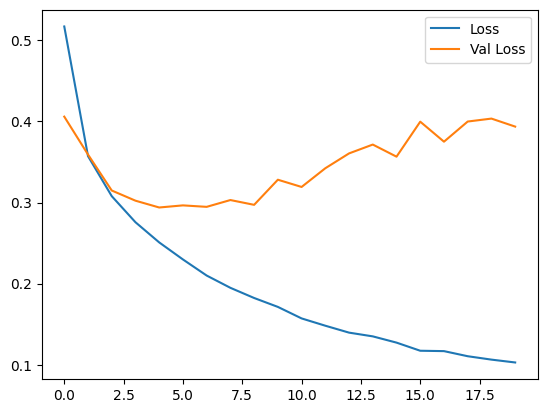

In [8]:
# plot the loss as per iteration
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.show()

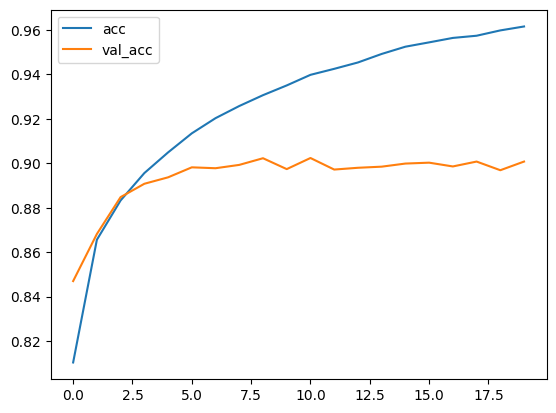

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[860   1  27  27   1   2  79   0   3   0]
 [  1 974   1  16   3   0   4   0   1   0]
 [ 24   0 862  10  52   0  51   0   1   0]
 [ 14   4  21 899  40   0  22   0   0   0]
 [  4   1  43  18 869   0  64   0   1   0]
 [  0   0   0   1   0 967   0  20   0  12]
 [111   0  60  23 105   1 693   0   7   0]
 [  0   0   0   0   0  11   0 948   0  41]
 [  4   1   4   4   5   3   8   1 969   1]
 [  1   0   0   1   0   7   0  24   0 967]]


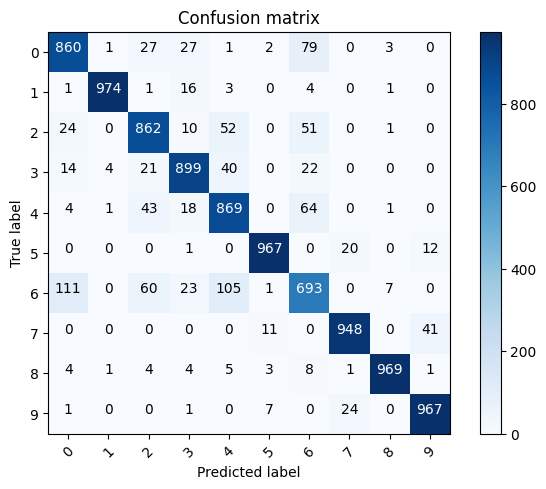

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))
